In [1]:
import numpy as np
import torch 
from d2l import torch as d2l
import matplotlib.pyplot as plt

# Convex function

In [2]:
def f(x):
    return x**2
def f_grad(x):
    return 2 * x

In [10]:
def gd(eta, f_grad):
    x = 10.0
    results = [x]
    
    for i in range(10):
        x -= eta*f_grad(x)
        results.append(float(x))
    print(f'epoch {10}, x: {x:.2f}')
    
    return results
results = gd(0.2, f_grad)

epoch 10, x: 0.06


In [23]:
def show_trace(results, f):
    bound = max(abs(min(results)), abs(max(results)))
    
    f_line = torch.arange(-bound, bound, 0.01)
    plt.plot(f_line, f(f_line))
    plt.plot(results, [f(x) for x in results], 'o-')
    plt.grid(linestyle='-', linewidth=1)

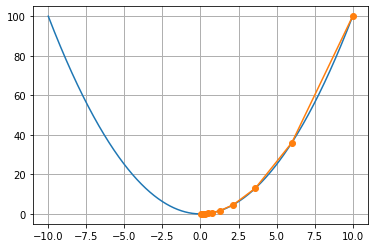

In [24]:
show_trace(results, f)

epoch 10, x: 3.49


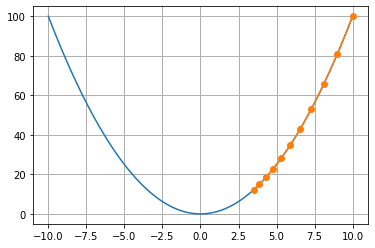

In [25]:
show_trace(gd(0.05, f_grad), f)

epoch 10, x: 61.92


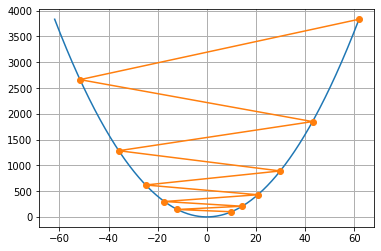

In [27]:
show_trace(gd(1.1, f_grad), f)

# Non convex function

In [28]:
c = torch.tensor(0.15 * np.pi)

def f(x):
    return x * torch.cos(c * x)
def f_grad(x):
    return torch.cos(c * x) - c * x * torch.sin(c * x)

epoch 10, x: -1.53


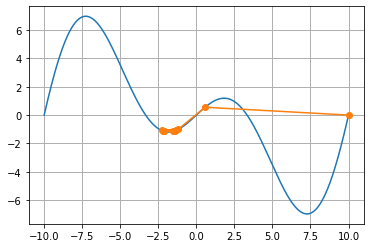

In [31]:
show_trace(gd(2, f_grad), f)

# Multivariate

In [52]:
def train_2d(trainer, steps=20, f_grad=None):
    x1, x2, s1, s2 = -5, 2, 0, 0
    
    results = [(x1, x2)]
    
    for i in range(steps):
        if (f_grad):
            x1, x2, s1, s2 = trainer(x1, x2, s1, s2, f_grad)
        else:
            x1, x2, s1, s2 = trainer(x1, x2, s1, s2)
        results.append((x1, x2))
    print(f'epoch {steps}, (x1, x2): ({x1}, {x2})')
    return results

def show_trace_2d(f, results):
    plt.plot(*zip(*results), '-o', color='#ff7f0e')
    
    x1, x2 = torch.meshgrid(torch.arange(-5.5, 3.0, 0.1), torch.arange(-3.0, 3.0, 0.1))
    plt.contour(x1, x2, f(x1, x2))
    plt.grid(linestyle='-', linewidth=1)
    plt.xlabel('x1')
    plt.ylabel('x2')

In [48]:
torch.meshgrid(torch.arange(-5.5, 1.0, 0.1), torch.arange(-3.0, 1.0, 0.1))

(tensor([[-5.5000, -5.5000, -5.5000,  ..., -5.5000, -5.5000, -5.5000],
         [-5.4000, -5.4000, -5.4000,  ..., -5.4000, -5.4000, -5.4000],
         [-5.3000, -5.3000, -5.3000,  ..., -5.3000, -5.3000, -5.3000],
         ...,
         [ 0.7000,  0.7000,  0.7000,  ...,  0.7000,  0.7000,  0.7000],
         [ 0.8000,  0.8000,  0.8000,  ...,  0.8000,  0.8000,  0.8000],
         [ 0.9000,  0.9000,  0.9000,  ...,  0.9000,  0.9000,  0.9000]]),
 tensor([[-3.0000, -2.9000, -2.8000,  ...,  0.7000,  0.8000,  0.9000],
         [-3.0000, -2.9000, -2.8000,  ...,  0.7000,  0.8000,  0.9000],
         [-3.0000, -2.9000, -2.8000,  ...,  0.7000,  0.8000,  0.9000],
         ...,
         [-3.0000, -2.9000, -2.8000,  ...,  0.7000,  0.8000,  0.9000],
         [-3.0000, -2.9000, -2.8000,  ...,  0.7000,  0.8000,  0.9000],
         [-3.0000, -2.9000, -2.8000,  ...,  0.7000,  0.8000,  0.9000]]))

epoch 20, (x1, x2): (-0.057646075230342354, 7.312316880125945e-05)


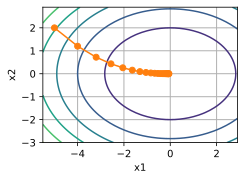

In [53]:
def f_2d(x1, x2):
    return x1**2 + 2 * x2**2

def f_2d_grad(x1, x2):
    return (2*x1, 4*x2)

def gd_2d(x1, x2, s1, s2, f_grad):
    g1, g2 = f_grad(x1, x2)
    return (x1 - eta*g1, x2 - eta*g2, 0, 0)

eta = 0.1
show_trace_2d(f_2d, train_2d(gd_2d, f_grad=f_2d_grad))